In [2]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

### Steady state model with friction

$$
\begin{align}
-fv & = -g\frac{\partial\eta}{\partial x} - ku \tag{1a}\\
fu & = -g\frac{\partial\eta}{\partial y} - kv + \tau_y\tag{1b}
\end{align}
$$

$$\frac{\partial}{\partial x}(hu) + \frac{\partial}{\partial y}(hv) = 0 \tag{1c}$$

(1c) implies a streamfunction (assuming $\nabla h = 0$)

$$u = -\frac{\partial\psi}{\partial y}, \hspace{0.5cm} v = \frac{\partial\psi}{\partial x} \tag{2}$$

Substituting (4) into (1) and (2) and cross-differentiating gives the Poisson equation

$$\nabla^2\psi = \frac{\tau_y}{k} \tag{3}$$

Let $\psi = \psi_H + \psi_P$, where

$$\frac{\partial^2}{\partial x^2}\psi_P(x) = \frac{\tau_y}{k} \tag{4a}$$

$$\psi_P(x) = \frac{\tau_yx}{2k}\left(x - S\right) \tag{4b}$$

Consider Laplace equation for homogeneous solution $\psi_H$

$$\nabla^2\psi_H = 0 \tag{5}$$

Separation of variables gives

$$\frac{X''}{X} = -\frac{Y''}{Y} = -\lambda^2 \tag{6}$$

Solve $X$

$$X'' + \lambda^2 X = 0 \tag{7a}$$

$$X = a_1\cos(\lambda x) + a_2\sin(\lambda x) \tag{7b}$$

$$X(0) = X(S) = 0 \hspace{0.2cm} \to \hspace{0.2cm} a_1 = 0, \hspace{0.2cm} \lambda = \frac{n\pi}{S} \tag{7c}$$

Solve $Y$

$$Y'' - \lambda^2 Y = 0 \tag{8a}$$

$$Y = b_1\cosh(\lambda y) + b_2\sinh(\lambda y) \tag{8b}$$

$$\frac{\partial}{\partial y}Y(0) = 0 \hspace{0.3cm} \to \hspace{0.3cm} b_2 = 0 \tag{8c}$$

General solution

$$\psi_H(x, y) = \sum_{n=1}^\infty c_n\cosh(\lambda y)\sin(\lambda x) \tag{9}$$

To obtain the coefficients $c_n$, consider $y$ boundary

$$\psi_H(x, L) = \sum_{n=1}^\infty c_n\cosh(\lambda L)\sin(\lambda x) = -\psi_P(x) \tag{10}$$

Equation (10) is a Fourier sine series for $-\psi_P(x)$ with Fourier coefficients

$$
\begin{align}
c_n\cosh(\lambda L) & = -\frac{2}{S}\int_{0}^{S}\psi_P(x)\sin(\lambda x)dx \\
& = \frac{\tau_y}{k}\left(\int_0^Sx\sin(\lambda x)dx - \frac{1}{S}\int_0^Sx^2\sin(\lambda x)dx \right) \\
& = \frac{\tau_y}{\lambda^2kS}\left[\left(1 - 2x\right)\sin(\lambda x) + \left(\lambda x(x - S) - \frac{2}{\lambda}\right)\cos(\lambda x)\right]_0^S \\
& = \frac{2\tau_y}{\lambda^3kS}\left(1 + (-1)^{n+1}\right) \tag{11}
\end{align}
$$

The coefficients $c_n$ are thus

$$c_n = \frac{2\tau_y}{\lambda^3kS}\frac{1 + (-1)^{n+1}}{\cosh(\lambda L)} \tag{12}$$

And the full solution is (in the limit of large $n$)

$$\psi(x, y) = \psi_P(x) + \psi_H(x, y) = \frac{\tau_y}{k}\left[\frac{x}{2}(x - S) + \frac{2S^2}{\pi^3}\sum_{n=1}^\infty\frac{1 + (-1)^{n+1}}{n^3}\exp\left(\frac{n\pi(y-L)}{S}\right)\sin\left(\frac{n\pi x}{S}\right)\right] \tag{13}$$

In [161]:
# Arbitrary scales (for testing)
S = 100
L = 100
tau_y = 1
k = 1
N = 1000

# Indices and arrays
x = np.arange(S)
y = np.arange(0, L)
xi, yi = np.meshgrid(x, y)
psi_H = np.zeros(xi.shape)

# Sum over n
for n in range(1, N):
    psi_H = psi_H + (1 + (-1)**(n + 1)) / n**3 * np.exp(n * np.pi * (yi - L) / S) * np.sin(n * np.pi * xi / S)

# Assemble full solution
psi = tau_y / k * (2 * S**2 / np.pi**3 * psi_H + xi / 2 * (xi - S))

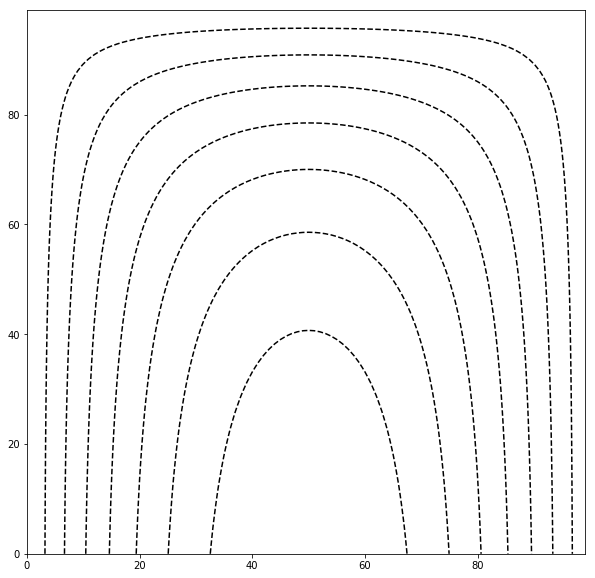

In [163]:
# Plot psi
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
c = ax.contour(x, y, psi, colors='k')

### Summary

Based on the model

$$\nabla^2\psi = \frac{\tau_y}{k} = \zeta$$

a northward (positive) wind stress generates a cyclonic (positive) vorticity everywhere. This produces a downwind flow to the right of the wind and an upwind flow to the left of the wind. I'm not quite sure how to reconcile that flow pattern with our model since we're looking for downwind flow along the VI coast in the surface and upwind flow in the lower layer.